In [1]:
import pandas as pd


data = pd.read_csv("dataset.csv")

print(data.head())

print(data.info())

  stock_symbol        date      open      high       low     close  adj_close   
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213  \
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close    

In [2]:
data['date'] = pd.to_datetime(data['date'])

missing_values = data.isnull().sum()
print(missing_values)

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


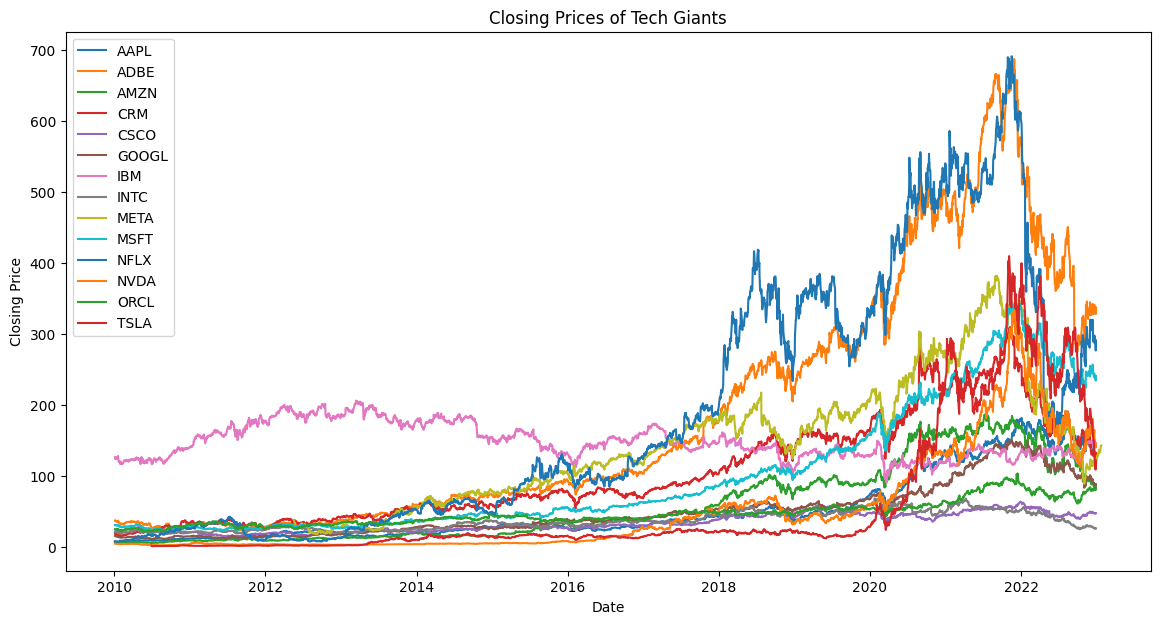

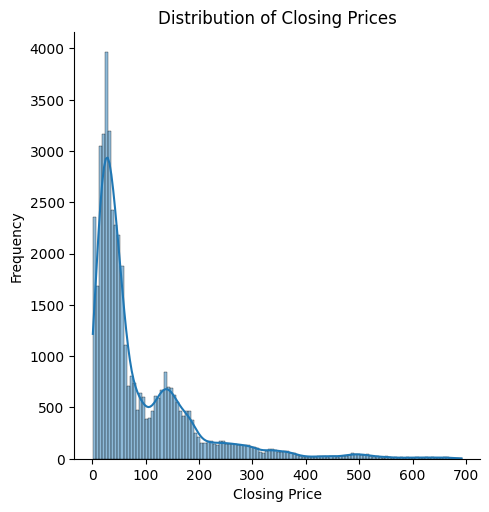

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(14, 7))
for stock in data['stock_symbol'].unique():
    stock_data = data[data['stock_symbol'] == stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock)
plt.legend()
plt.title('Closing Prices of Tech Giants')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


sns.displot(data['close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

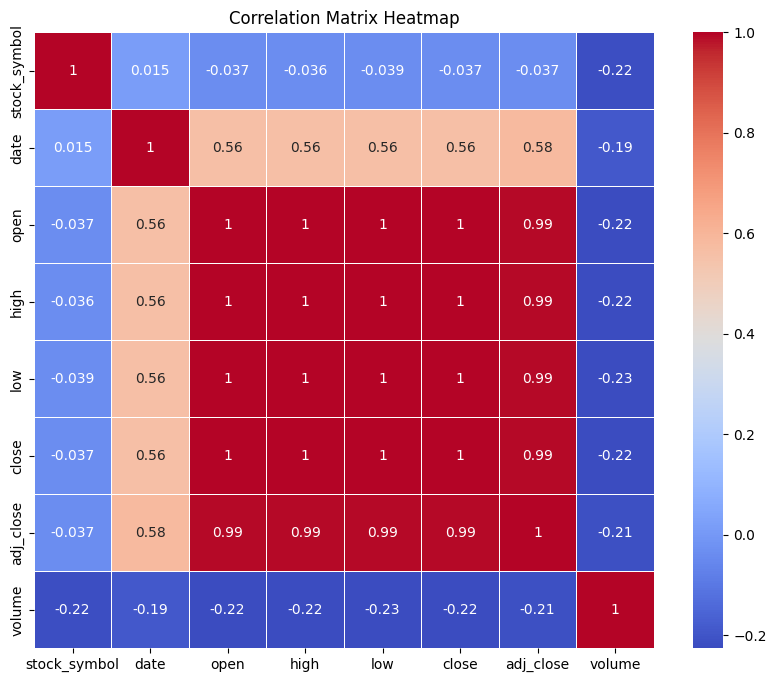

In [4]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
corr_data = data.copy(deep=True)
corr_data['stock_symbol'] = label_encoder.fit_transform(data['stock_symbol'])


correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

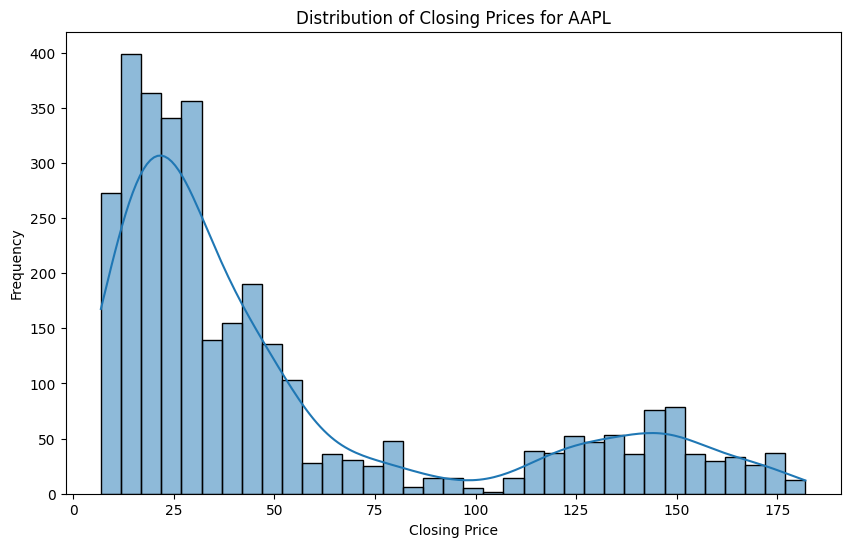

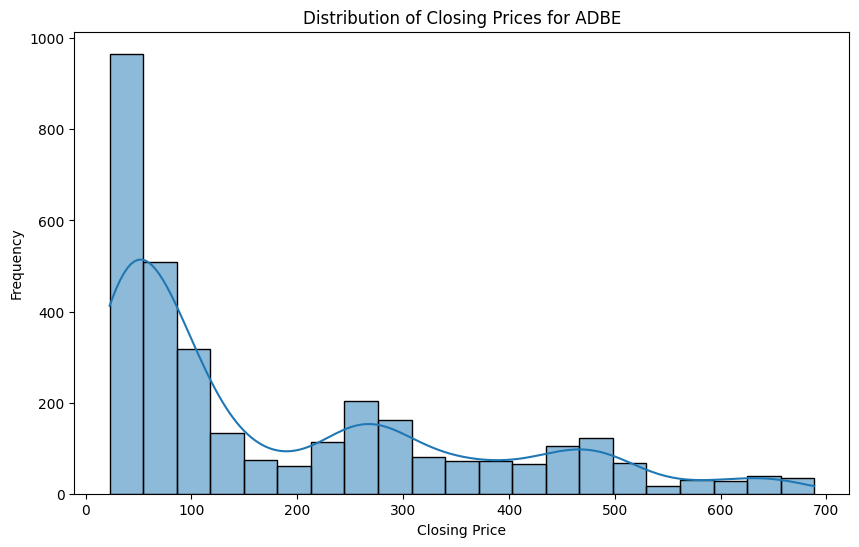

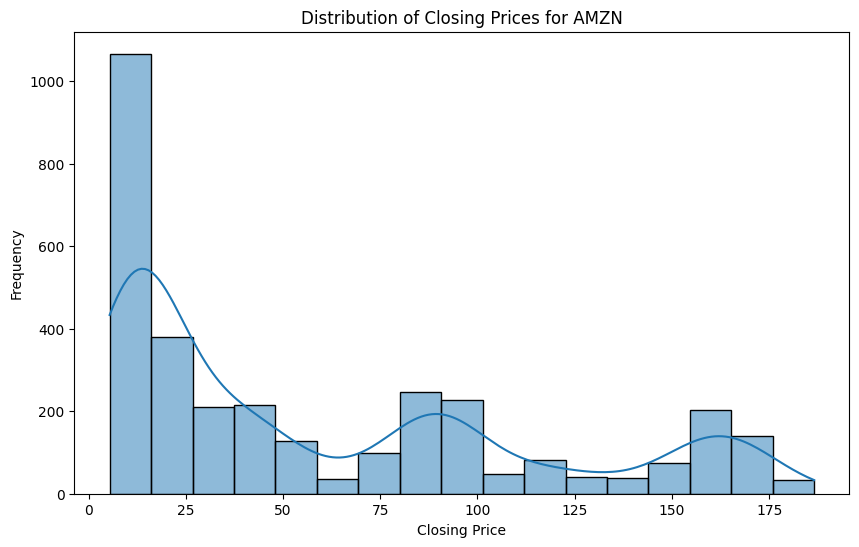

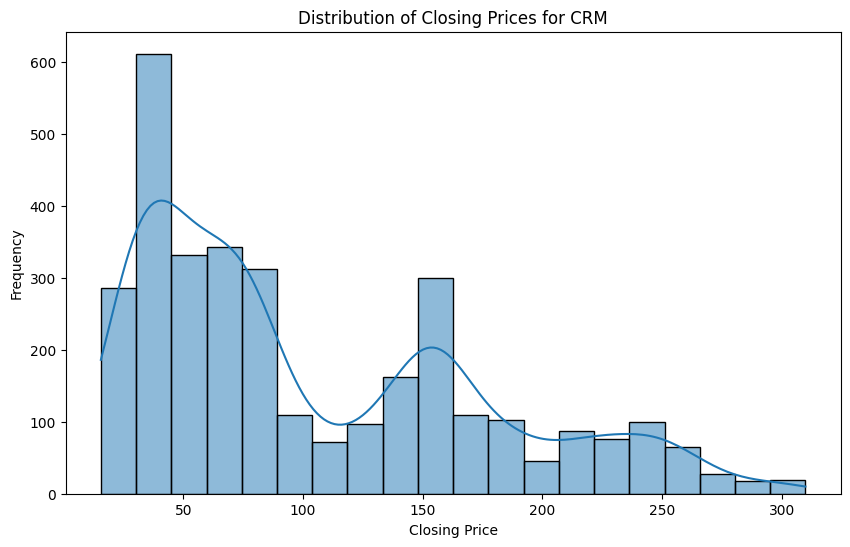

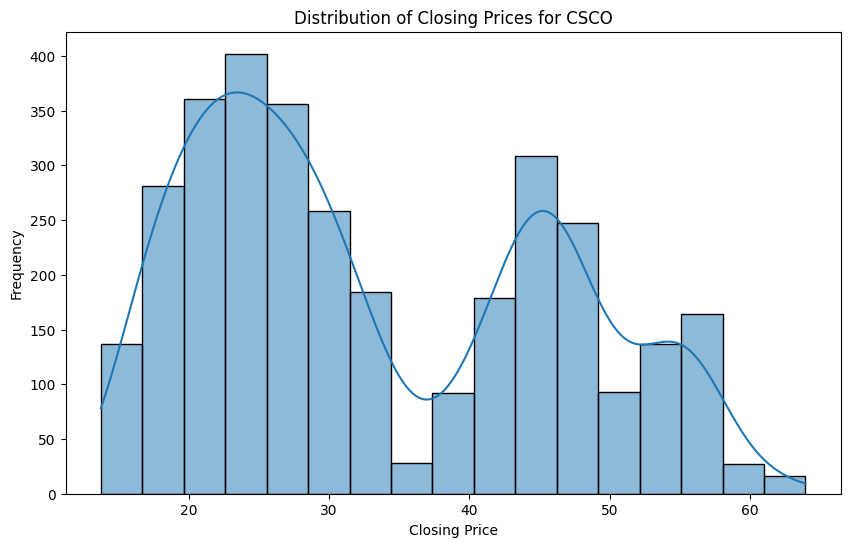

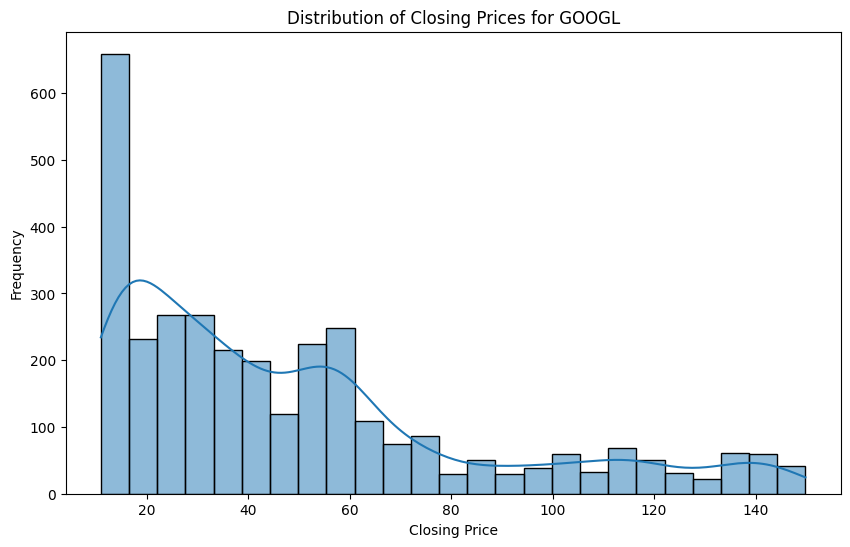

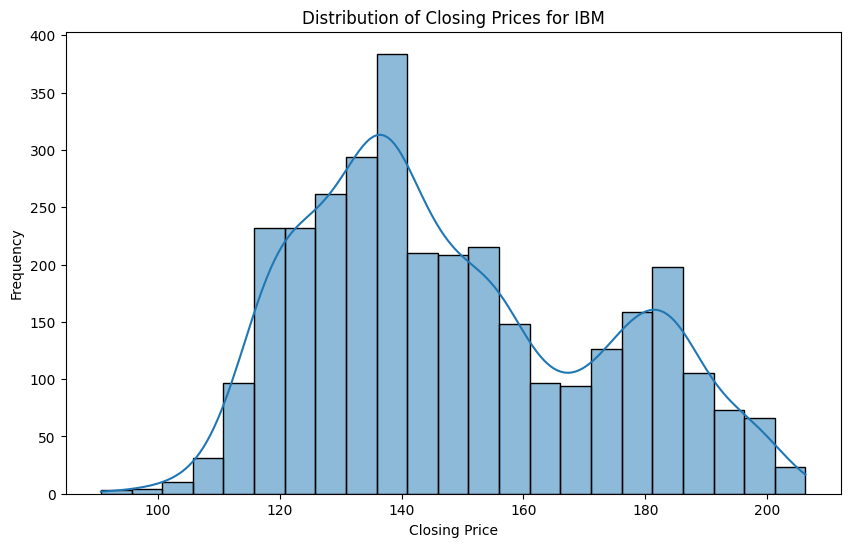

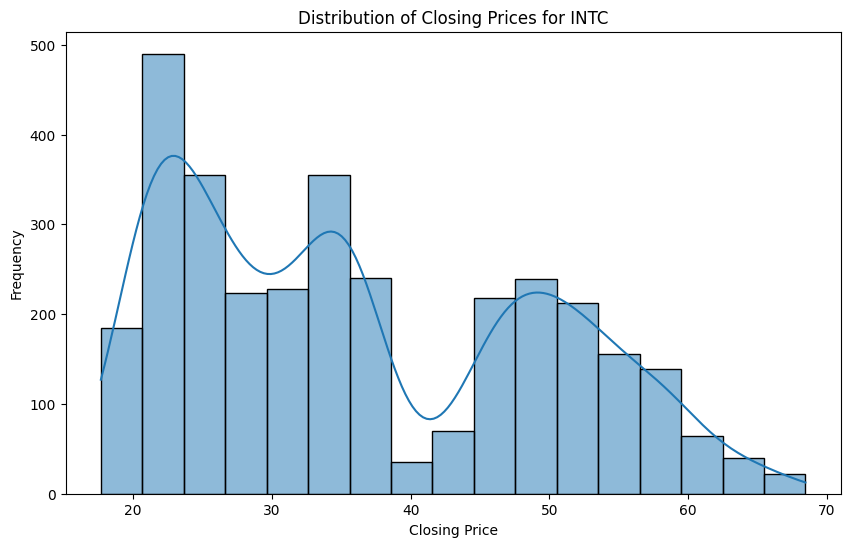

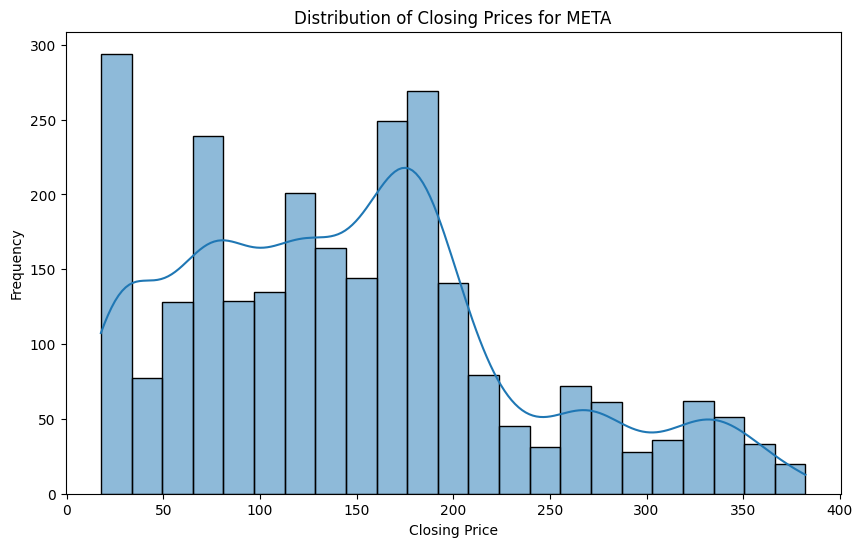

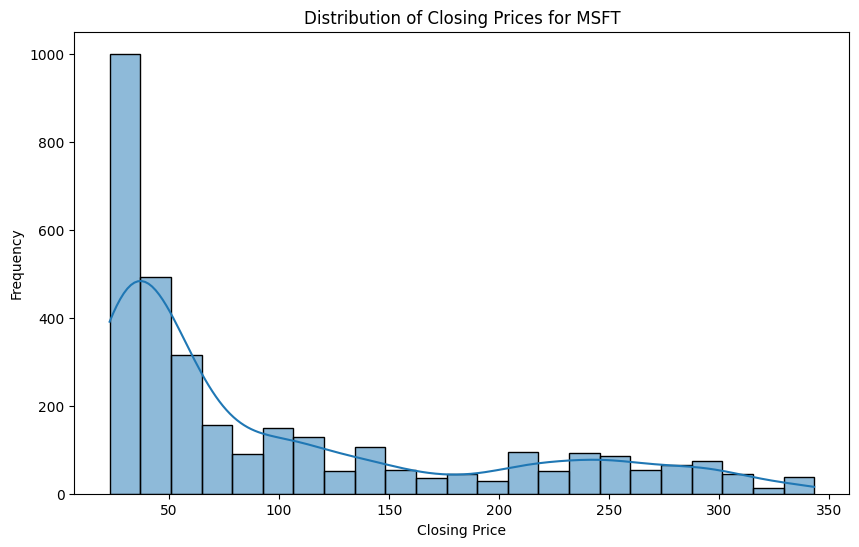

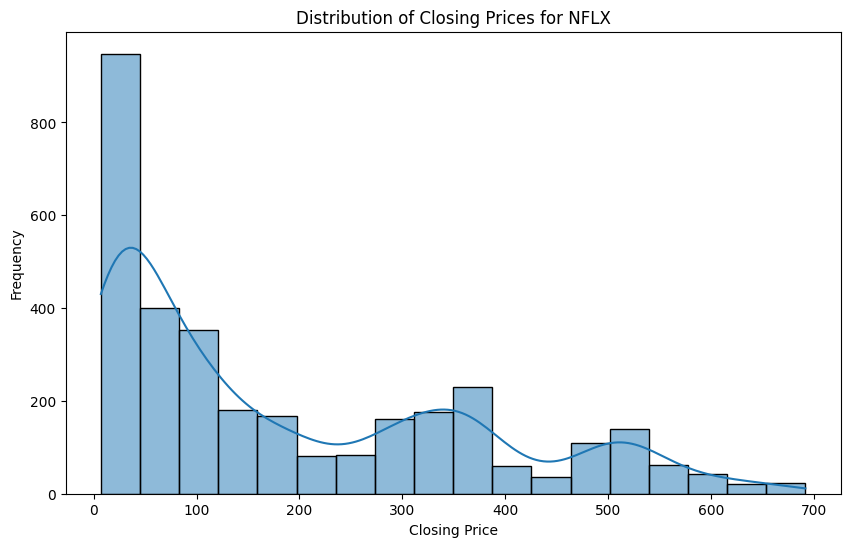

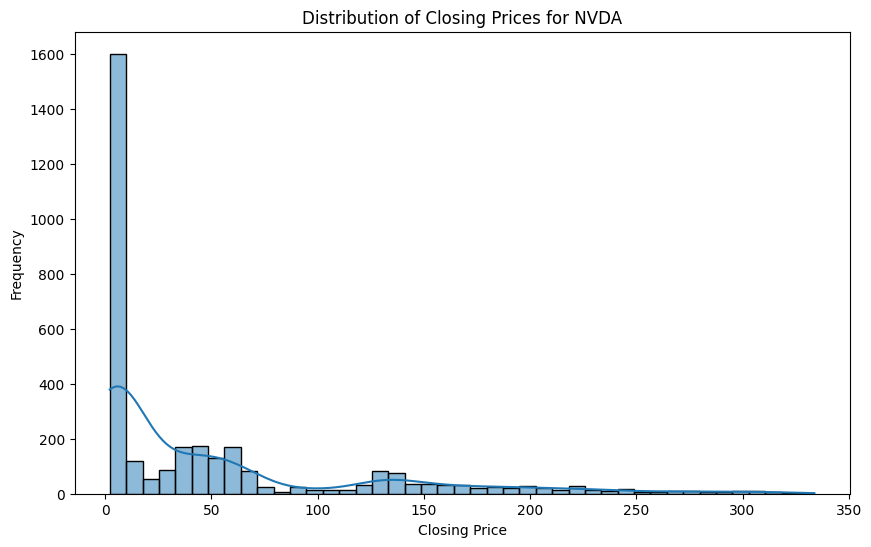

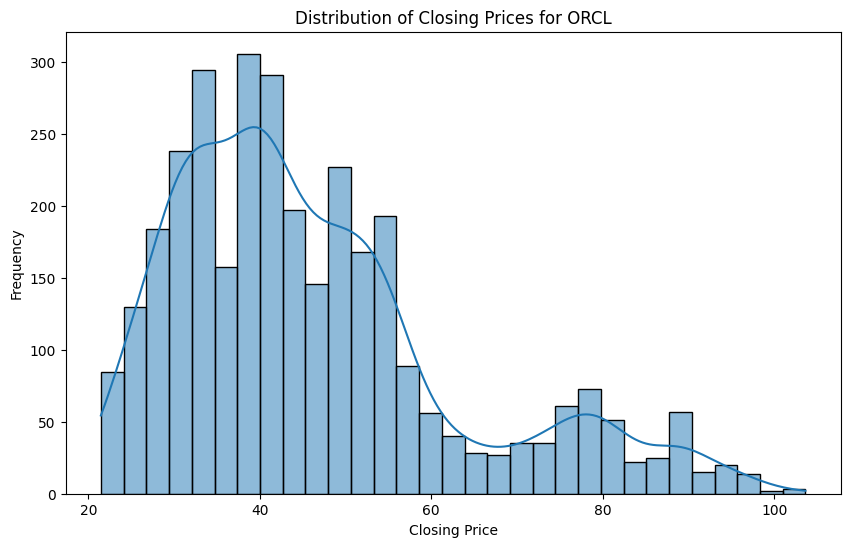

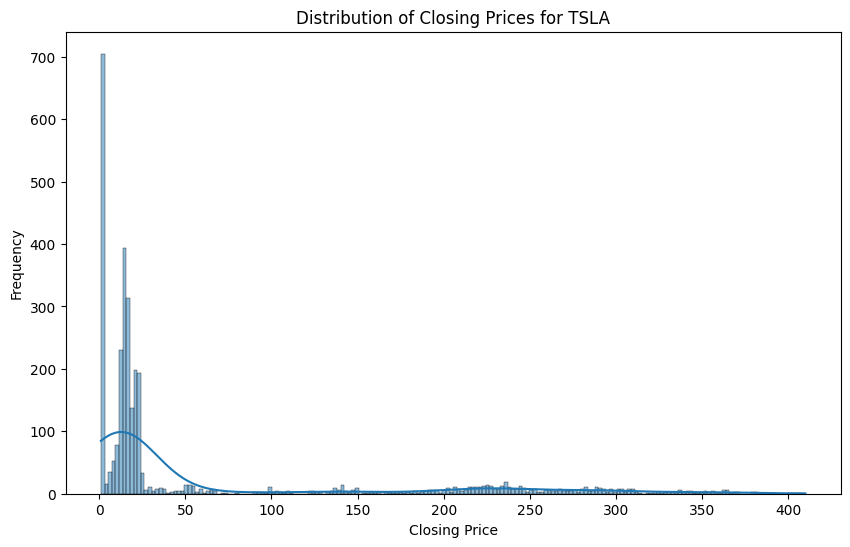

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stock_distribution(stock_symbol):
    stock_data = data[data['stock_symbol'] == stock_symbol]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(stock_data['close'], kde=True)
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Closing Prices for {stock_symbol}')
    plt.show()

# Get unique stock symbols
stocks = data['stock_symbol'].unique()

# Plot distribution for each stock
for stock in stocks:
    plot_stock_distribution(stock)

In [6]:
import numpy as np

def custom_linear_regression(X, y): 
    X = np.hstack((np.ones((X.shape[0], 1)), X))    
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

models = {
    'custom': {},
    'library': {}
}

results = {
    'custom': [],
    'library': []
}


def apply_linear_regression(symbol):
    stock_data = data[data['stock_symbol'] == symbol]
    
    X = stock_data[['open', 'high', 'low', 'volume']]
    y = stock_data['close']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    with open(f'models/linear_regression/{symbol}.pkl', 'wb') as file:
        pickle.dump(model, file)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    models['library'][symbol] = model
    results['library'].append({
        'stock_symbol': symbol,
        'mse': mse,
        'r2': r2,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    })


def apply_custom_linear_regression(symbol):
    stock_data = data[data['stock_symbol'] == symbol]
    
    X = stock_data[['open', 'high', 'low', 'volume']].values
    y = stock_data['close'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    theta = custom_linear_regression(X_train, y_train)
    
    X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    y_pred = X_test_with_intercept.dot(theta)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    models['custom'][symbol] = theta
    results['custom'].append({
        'stock_symbol': symbol,
        'mse': mse,
        'r2': r2,
        'coefficients': theta[1:], 
        'intercept': theta[0]
    })


for symbol in stocks:
    apply_linear_regression(symbol)
    apply_custom_linear_regression(symbol)


In [8]:
# Display Library Results
pd.DataFrame(results['library'])


,stock_symbol,mse,r2,coefficients,intercept
0,AAPL,0.204933,0.999912,"[-0.6679566547315563, 0.8893414409785156, 0.77...",0.020982
1,ADBE,3.960778,0.999874,"[-0.6027522442821152, 0.8655244038274316, 0.73...",0.019235
2,AMZN,0.355467,0.999882,"[-0.6465871294237515, 0.8430541271235691, 0.80...",-0.002726
3,CRM,0.950378,0.999819,"[-0.5974101734221041, 0.8241538242838609, 0.77...",0.023141
4,CSCO,0.036839,0.999780,"[-0.5787793080457818, 0.7978920297012864, 0.78...",0.004579
5,GOOGL,0.126676,0.999908,"[-0.6067615461107647, 0.7887537368566853, 0.81...",0.014499
6,IBM,0.510759,0.999152,"[-0.5676976658250515, 0.796750109518592, 0.769...",0.179930
7,INTC,0.074768,0.999559,"[-0.6433360352289844, 0.7556024448052135, 0.88...",-0.032380
8,META,1.608512,0.999785,"[-0.5637767065618094, 0.7573490925820693, 0.80...",0.048041
9,MSFT,0.625977,0.999923,"[-0.6404926650335094, 0.8225103058646105, 0.81...",0.035404


In [9]:

# Display Custom Results
pd.DataFrame(results['custom'])

,stock_symbol,mse,r2,coefficients,intercept
0,AAPL,0.204933,0.999912,"[-0.6679566577164613, 0.8893414432341072, 0.77...",0.020982
1,ADBE,3.960778,0.999874,"[-0.6027522442928956, 0.8655244038674494, 0.73...",0.019235
2,AMZN,0.355467,0.999882,"[-0.6465871302120902, 0.8430541269594181, 0.80...",-0.002726
3,CRM,0.950378,0.999819,"[-0.5974101735035842, 0.8241538243399518, 0.77...",0.023141
4,CSCO,0.036839,0.999780,"[-0.5787793088871536, 0.7978920283094171, 0.78...",0.004579
5,GOOGL,0.126676,0.999908,"[-0.6067615464632277, 0.7887537368143187, 0.81...",0.014499
6,IBM,0.510759,0.999152,"[-0.5676976658905346, 0.7967501095518827, 0.76...",0.179930
7,INTC,0.074768,0.999559,"[-0.6433360338729088, 0.7556024450683729, 0.88...",-0.032380
8,META,1.608512,0.999785,"[-0.5637767066051322, 0.7573490928520902, 0.80...",0.048041
9,MSFT,0.625977,0.999923,"[-0.640492665235898, 0.8225103056299385, 0.818...",0.035404


In [10]:
# Using RandomForest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)
    
    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])
    
    def _build_tree(self, X, y, depth):
    
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)
   
        feature_idx = np.argmax(np.var(X, axis=0))  
        split_value = np.mean(X[:, feature_idx])
        
   
        left_mask = X[:, feature_idx] < split_value
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[~left_mask], y[~left_mask]
        
   
        left_tree = self._build_tree(X_left, y_left, depth + 1)
        right_tree = self._build_tree(X_right, y_right, depth + 1)
        
        return {'feature_idx': feature_idx,
                'split_value': split_value,
                'left_tree': left_tree,
                'right_tree': right_tree}
    
    def _predict_tree(self, x, tree):
        if isinstance(tree, (float, np.float64)):  
            return tree
        if x[tree['feature_idx']] < tree['split_value']:
            return self._predict_tree(x, tree['left_tree'])
        else:
            return self._predict_tree(x, tree['right_tree'])

class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
        
    def fit(self, X, y):
        self.estimators = []
        X_np = X.values if isinstance(X, pd.DataFrame) else X  
        y_np = y.values if isinstance(y, pd.Series) else y  
        
        for _ in range(self.n_estimators):
            idx = np.random.choice(len(X_np), size=len(X_np), replace=True)
            X_bootstrapped = X_np[idx]
            y_bootstrapped = y_np[idx]
            
            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_bootstrapped, y_bootstrapped)
            self.estimators.append(tree)
    
    def predict(self, X):
        X_np = X.values if isinstance(X, pd.DataFrame) else X 
        predictions = np.zeros(len(X_np))
        for tree in self.estimators:
            predictions += tree.predict(X_np)
        return predictions / self.n_estimators


def apply_random_forest(symbol):
    stock_data = data[data['stock_symbol'] == symbol]
    rf = RandomForestRegressor()

    X = stock_data[['open', 'high', 'low', 'volume']]
    y = stock_data['close']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(symbol, mse, mae, r2)

def apply_custom_random_forest(symbol):
    stock_data = data[data['stock_symbol'] == symbol]
    rf = RandomForestRegressor()

    X = stock_data[['open', 'high', 'low', 'volume']]
    y = stock_data['close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = CustomRandomForestRegressor(n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(symbol, mse, mae, r2)

for symbol in stocks:
    print("Python Package")
    apply_random_forest(symbol)
    print("Without Python Package")
    apply_custom_random_forest(symbol)

Python Package
AAPL 0.41485606500388383 0.3378030588702283 0.999821040949309
Without Python Package
AAPL 1201.0862538248837 24.717545273270957 0.48187992435273996
Python Package
ADBE 7.102673091336752 1.3524355237862604 0.9997733987906287
Without Python Package
ADBE 27476.748392950387 135.56882349391506 0.1233913858391813
Python Package
AMZN 0.6828904589399943 0.4283675883206135 0.9997742098871797
Without Python Package
AMZN 2934.0206635820477 47.133876450401765 0.02989879566368947
Python Package
CRM 1.519686835223084 0.7399872182900756 0.9997112171651147
Without Python Package
CRM 4956.648718029737 59.929679514178865 0.05809865878491194
Python Package
CSCO 0.06268137659921535 0.16552932929771008 0.9996262481674963
Without Python Package
CSCO 91.25583239855813 7.781328538208378 0.45586653586613624
Python Package
GOOGL 0.2762270500853332 0.2888324129465632 0.9997997740618004
Without Python Package
GOOGL 867.4893354402368 21.122900950049825 0.37119168447485495
Python Package
IBM 0.671031